#Auto MPG Analysis 

##Data Source
https://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/

In [476]:
import numpy as np
import csv
import matplotlib.pyplot as plt
from scipy.stats import mode
import pandas as pd
import seaborn as sns
from io import StringIO
import requests
import json
from sklearn.preprocessing import StandardScaler  # For scaling dataset
from sklearn.cluster import KMeans, AgglomerativeClustering, AffinityPropagation #For clustering
from sklearn.mixture import GaussianMixture
%matplotlib inline

In [477]:
df = pd.read_csv('../data/auto-mpg.csv')
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1.0,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1.0,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1.0,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1.0,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1.0,ford torino


In [478]:
#Number of records
len(df.index)

400

In [479]:
#Get types of fields
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           400 non-null    float64
 1   cylinders     400 non-null    int64  
 2   displacement  400 non-null    float64
 3   horsepower    400 non-null    object 
 4   weight        400 non-null    int64  
 5   acceleration  400 non-null    float64
 6   model year    400 non-null    int64  
 7   origin        398 non-null    float64
 8   car name      400 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 28.2+ KB


In [480]:
df[~df.horsepower.str.contains("\d+", na=False)]

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
126,21.0,6,200.0,?,2875,17.0,74,1.0,ford maverick
330,40.9,4,85.0,?,1835,17.3,80,2.0,renault lecar deluxe
336,23.6,4,140.0,?,2905,14.3,80,1.0,ford mustang cobra
354,34.5,4,100.0,?,2320,15.8,81,2.0,renault 18i
374,23.0,4,151.0,?,3035,20.5,82,1.0,amc concord dl


In [481]:
df = df[df.horsepower != '?']

In [482]:
df["horsepower"] = pd.to_numeric(df["horsepower"])

In [483]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 395 entries, 0 to 399
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           395 non-null    float64
 1   cylinders     395 non-null    int64  
 2   displacement  395 non-null    float64
 3   horsepower    395 non-null    int64  
 4   weight        395 non-null    int64  
 5   acceleration  395 non-null    float64
 6   model year    395 non-null    int64  
 7   origin        393 non-null    float64
 8   car name      395 non-null    object 
dtypes: float64(4), int64(4), object(1)
memory usage: 30.9+ KB


In [484]:
df.shape

(395, 9)

In [485]:
df.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
count,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,393.000000
mean,23.521013,5.460759,193.730380,104.015190,3034.463291,15.582785,75.997468,1.577608
std,7.853144,1.704087,104.540104,38.807867,1597.384379,2.797870,3.703133,0.804774
min,9.000000,3.000000,68.000000,0.000000,0.000000,8.000000,70.000000,1.000000
25%,17.250000,4.000000,104.500000,75.000000,2220.000000,13.800000,73.000000,1.000000
50%,23.000000,4.000000,146.000000,92.000000,2795.000000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,264.500000,125.000000,3616.500000,17.200000,79.000000,2.000000
max,46.600000,8.000000,455.000000,230.000000,29709.000000,24.800000,82.000000,3.000000


In [486]:
#Find blank or whitespace
df = df.replace(r'\s+\t+', np.nan, regex=True).replace('', np.nan)
#Is anythign null?
df.isnull().sum()

mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model year      0
origin          2
car name        0
dtype: int64

In [487]:
df[df.isna().any(axis=1)]

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
10,15.0,8,383.0,170,3563,10.0,70,NaN,dodge challenger se
104,12.0,8,400.0,167,4906,12.5,73,NaN,ford country


In [488]:
df.notnull().mean()

mpg             1.000000
cylinders       1.000000
displacement    1.000000
horsepower      1.000000
weight          1.000000
acceleration    1.000000
model year      1.000000
origin          0.994937
car name        1.000000
dtype: float64

<AxesSubplot:>

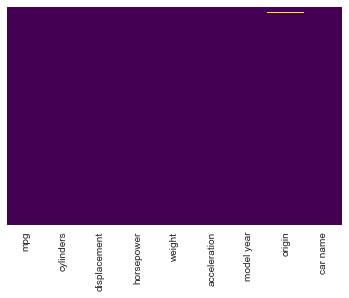

In [489]:
sns.heatmap(df.isnull(),cbar=False,yticklabels=False,cmap = 'viridis')

In [490]:
#How many unique values?
for column in df:
    print(column, len(df[column].unique()))

mpg 127
cylinders 5
displacement 81
horsepower 94
weight 347
acceleration 95
model year 13
origin 4
car name 301


In [491]:
#How many unique values?
for column in df:
    print(column, df[column].value_counts())

mpg 13.0    20
14.0    19
18.0    17
15.0    16
26.0    14
        ..
32.9     1
26.5     1
19.1     1
33.8     1
31.8     1
Name: mpg, Length: 127, dtype: int64
cylinders 4    202
8    103
6     83
3      4
5      3
Name: cylinders, dtype: int64
displacement 97.0     22
350.0    18
98.0     18
318.0    17
250.0    17
         ..
83.0      1
181.0     1
81.0      1
96.0      1
104.0     1
Name: displacement, Length: 81, dtype: int64
horsepower 150    22
90     20
88     19
110    18
100    17
       ..
132     1
133     1
135     1
137     1
230     1
Name: horsepower, Length: 94, dtype: int64
weight 2130    5
2720    4
1985    4
2300    3
2125    3
       ..
2735    1
3245    1
2219    1
2188    1
2900    1
Name: weight, Length: 347, dtype: int64
acceleration 14.5    23
15.5    21
16.0    16
14.0    16
13.5    15
        ..
11.1     1
12.1     1
19.9     1
20.7     1
18.3     1
Name: acceleration, Length: 95, dtype: int64
model year 73    40
78    36
76    34
82    32
75    30
70    2

ValueError: hist method requires numerical or datetime columns, nothing to plot.

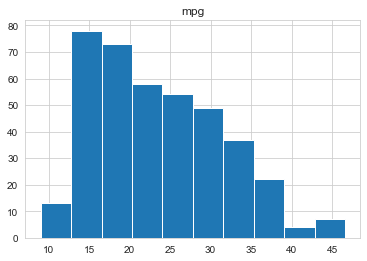

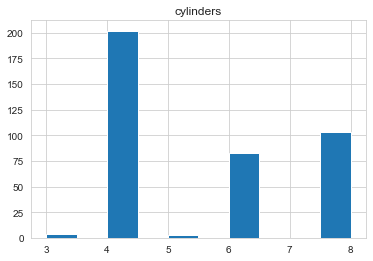

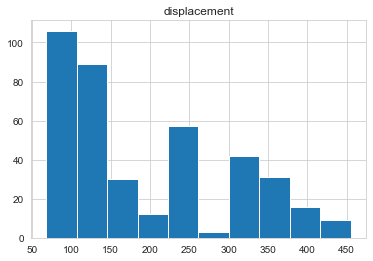

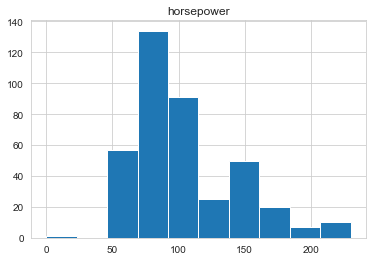

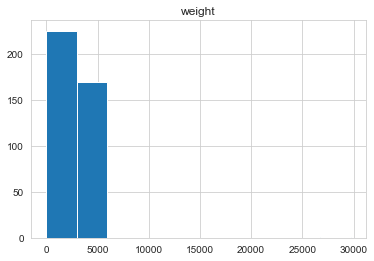

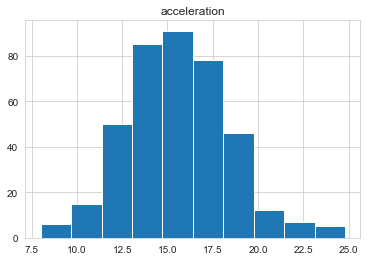

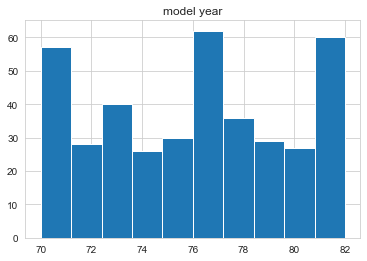

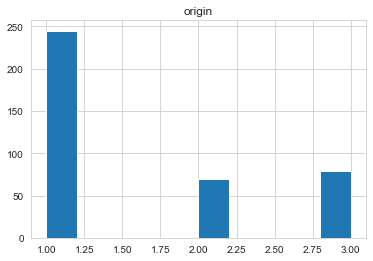

In [492]:
#Lets look at the histogram of each
import matplotlib.pyplot as plt
%matplotlib inline
for col in df:
    df.hist(column=col)

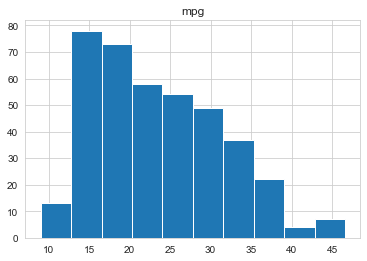

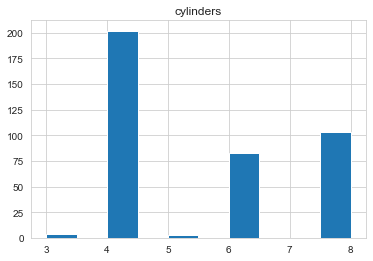

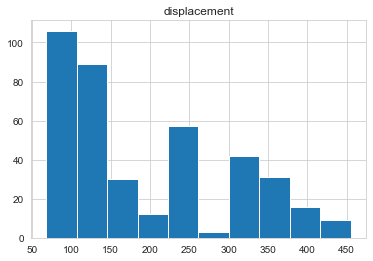

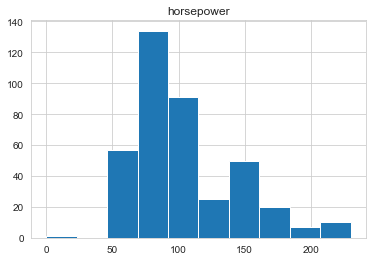

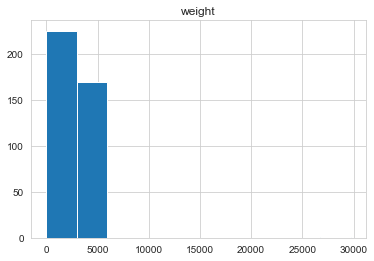

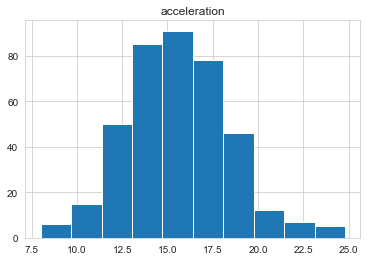

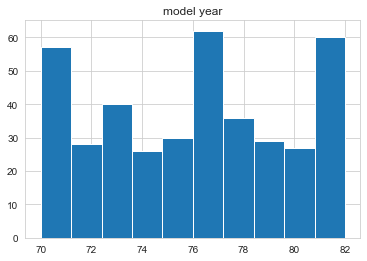

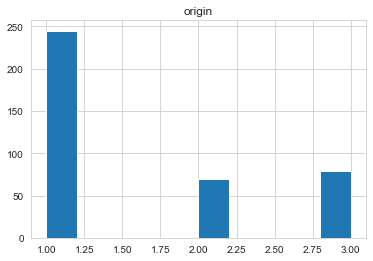

In [493]:
#Lets look at the histogram of each
import matplotlib.pyplot as plt
%matplotlib inline
for col in df:
    if pd.api.types.is_numeric_dtype(df[col]):
        df.hist(column=col)

In [494]:
#Any duplicates?
df[df.duplicated()].sum()  

mpg                            75.0
cylinders                         8
displacement                  216.0
horsepower                      134
weight                         4850
acceleration                   44.0
model year                      164
origin                          3.0
car name        vw pickupchevy s-10
dtype: object

In [495]:
df[df.duplicated()]

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
395,44.0,4,97.0,52,2130,24.6,82,2.0,vw pickup
399,31.0,4,119.0,82,2720,19.4,82,1.0,chevy s-10


In [496]:
df = df.drop_duplicates()

In [497]:
#Split car name into make and model
labels=["make","model"]
mike = pd.DataFrame(df['car name'].apply(lambda x: x.split(' ', 1)).values.tolist(), columns=labels)
df = df.join(mike, lsuffix='_df', rsuffix='_mike')
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name,make,model
0,18.0,8,307.0,130,3504,12.0,70,1.0,chevrolet chevelle malibu,chevrolet,chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1.0,buick skylark 320,buick,skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1.0,plymouth satellite,plymouth,satellite
3,16.0,8,304.0,150,3433,12.0,70,1.0,amc rebel sst,amc,rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1.0,ford torino,ford,torino


In [498]:
df["make"] = df["make"].astype('category')
df["model"] = df["model"].astype('category')
df["make_cat"] = df["make"].cat.codes
df["model_cat"] = df["model"].cat.codes
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name,make,model,make_cat,model_cat
0,18.0,8,307.0,130,3504,12.0,70,1.0,chevrolet chevelle malibu,chevrolet,chevelle malibu,7,92
1,15.0,8,350.0,165,3693,11.5,70,1.0,buick skylark 320,buick,skylark 320,3,264
2,18.0,8,318.0,150,3436,11.0,70,1.0,plymouth satellite,plymouth,satellite,25,256
3,16.0,8,304.0,150,3433,12.0,70,1.0,amc rebel sst,amc,rebel sst,0,246
4,17.0,8,302.0,140,3449,10.5,70,1.0,ford torino,ford,torino,13,276


In [499]:
#Get Range
for col in df:
    if pd.api.types.is_numeric_dtype(df[col]):
        print(col, df[col].min(), df[col].max())

mpg 9.0 46.6
cylinders 3 8
displacement 68.0 455.0
horsepower 0 230
weight 0 29709
acceleration 8.0 24.8
model year 70 82
origin 1.0 3.0
make_cat -1 35
model_cat -1 293


In [500]:
#Get Mean
for col in df:
    if pd.api.types.is_numeric_dtype(df[col]):
        print(col, df[col].mean())

mpg 23.449872773536892
cylinders 5.468193384223919
displacement 194.16666666666666
horsepower 104.20356234096693
weight 3037.5648854961833
acceleration 15.550127226463106
model year 75.96692111959288
origin 1.578005115089514
make_cat 15.572519083969466
model_cat 144.44529262086513


In [501]:
#Get Median
for col in df:
    if pd.api.types.is_numeric_dtype(df[col]):
        print(col, df[col].median())

mpg 23.0
cylinders 4.0
displacement 151.0
horsepower 93.0
weight 2800.0
acceleration 15.5
model year 76.0
origin 1.0
make_cat 13.0
model_cat 144.0


In [502]:
#Get Mode
for col in df:
    if pd.api.types.is_numeric_dtype(df[col]):
        print(col, mode(df[col]).mode[0])

mpg 13.0
cylinders 4
displacement 97.0
horsepower 150
weight 1985
acceleration 14.5
model year 73
origin 1.0
make_cat 13
model_cat -1


In [503]:
#Calculate Variance
df.var()

mpg             6.076888e+01
cylinders       2.907787e+00
displacement    1.094609e+04
horsepower      1.505560e+03
weight          2.562307e+06
acceleration    7.622353e+00
model year      1.359839e+01
origin          6.496688e-01
make_cat        1.023678e+02
model_cat       6.907069e+03
dtype: float64

In [504]:
#Calculate Standard devation
df.std()

mpg                7.795440
cylinders          1.705223
displacement     104.623540
horsepower        38.801553
weight          1600.720659
acceleration       2.760861
model year         3.687600
origin             0.806020
make_cat          10.117698
model_cat         83.108779
dtype: float64

In [505]:
#Values in the 50% quantile
df.quantile

<bound method DataFrame.quantile of       mpg  cylinders  displacement  horsepower  weight  acceleration  \
0    18.0          8         307.0         130    3504          12.0   
1    15.0          8         350.0         165    3693          11.5   
2    18.0          8         318.0         150    3436          11.0   
3    16.0          8         304.0         150    3433          12.0   
4    17.0          8         302.0         140    3449          10.5   
..    ...        ...           ...         ...     ...           ...   
393  27.0          4         140.0          86    2790          15.6   
394  44.0          4          97.0          52    2130          24.6   
396  32.0          4         135.0          84    2295          11.6   
397  28.0          4         120.0          79    2625          18.6   
398  31.0          4         119.0          82    2720          19.4   

     model year  origin                   car name       make  \
0            70     1.0  chevrolet

In [506]:
#Calculate covariance
df.cov()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,make_cat,model_cat
mpg,60.768884,-10.332338,-656.288946,-233.674464,-5.660192e+03,9.105938,16.629205,3.530837,11.189996,-128.178897
cylinders,-10.332338,2.907787,169.650085,55.598328,1.208819e+03,-2.381947,-2.147738,-0.774064,-3.462611,25.694046
displacement,-656.288946,169.650085,10946.085034,3630.443027,7.829855e+04,-157.442432,-140.986820,-51.206532,-218.289541,1661.069728
horsepower,-233.674464,55.598328,3630.443027,1505.560497,2.737143e+04,-73.919669,-57.562127,-13.804302,-50.675514,429.648920
weight,-5660.191510,1208.819033,78298.554847,27371.433187,2.562307e+06,-718.578899,-1200.930246,-363.964089,-970.265559,3627.400880
acceleration,9.105938,-2.381947,-157.442432,-73.919669,-7.185789e+02,7.622353,2.899111,0.456155,1.650565,-16.549929
model year,16.629205,-2.147738,-140.986820,-57.562127,-1.200930e+03,2.899111,13.598393,0.534133,1.304701,-19.416355
origin,3.530837,-0.774064,-51.206532,-13.804302,-3.639641e+02,0.456155,0.534133,0.649669,1.603797,-11.011542
make_cat,11.189996,-3.462611,-218.289541,-50.675514,-9.702656e+02,1.650565,1.304701,1.603797,102.367814,53.701044
model_cat,-128.178897,25.694046,1661.069728,429.648920,3.627401e+03,-16.549929,-19.416355,-11.011542,53.701044,6907.069066


In [507]:
#Calculate correlatio
df.corr()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,make_cat,model_cat
mpg,1.000000,-0.777279,-0.804683,-0.772541,-0.453602,0.423097,0.578478,0.562916,0.141876,-0.197847
cylinders,-0.777279,1.000000,0.950919,0.840294,0.442858,-0.505949,-0.341552,-0.564947,-0.200697,0.181303
displacement,-0.804683,0.950919,1.000000,0.894296,0.467529,-0.545064,-0.365431,-0.611286,-0.206216,0.191034
horsepower,-0.772541,0.840294,0.894296,1.000000,0.440690,-0.690027,-0.402294,-0.443394,-0.129082,0.133235
weight,-0.453602,0.442858,0.467529,0.440690,1.000000,-0.162598,-0.203450,-0.281907,-0.059909,0.027267
acceleration,0.423097,-0.505949,-0.545064,-0.690027,-0.162598,1.000000,0.284758,0.205854,0.059089,-0.072128
model year,0.578478,-0.341552,-0.365431,-0.402294,-0.203450,0.284758,1.000000,0.180001,0.034969,-0.063354
origin,0.562916,-0.564947,-0.611286,-0.443394,-0.281907,0.205854,0.180001,1.000000,0.196228,-0.164071
make_cat,0.141876,-0.200697,-0.206216,-0.129082,-0.059909,0.059089,0.034969,0.196228,1.000000,0.063864
model_cat,-0.197847,0.181303,0.191034,0.133235,0.027267,-0.072128,-0.063354,-0.164071,0.063864,1.000000


<ipython-input-508-345ac041542f>:18: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(labels,fontsize=10)
<ipython-input-508-345ac041542f>:19: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_yticklabels(labels,fontsize=10)


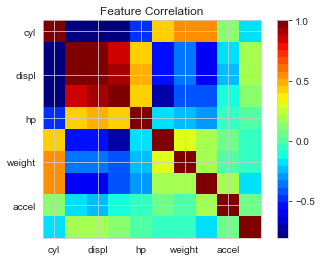

In [508]:
#Visualize correlation
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

def correlation_matrix(df):
    from matplotlib import pyplot as plt
    from matplotlib import cm as cm

    fig = plt.figure()
    ax1 = fig.add_subplot(111)
    cmap = cm.get_cmap('jet', 30)
    cax = ax1.imshow(df.corr(), interpolation="nearest", cmap=cmap)
    ax1.grid(True)
    plt.title('Feature Correlation')
    labels=['mpg','cyl','displ','hp','weight','accel','yr','origin']
    ax1.set_xticklabels(labels,fontsize=10)
    ax1.set_yticklabels(labels,fontsize=10)
    fig.colorbar(cax, ticks=[-1,-.5,0,.5,1])
    plt.show()

correlation_matrix(df)

<AxesSubplot:>

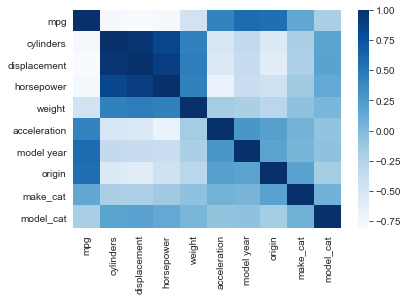

In [509]:
plt.figure(figsize=(6,4))
sns.heatmap(df.corr(),cmap='Blues',annot=False) 

<AxesSubplot:>

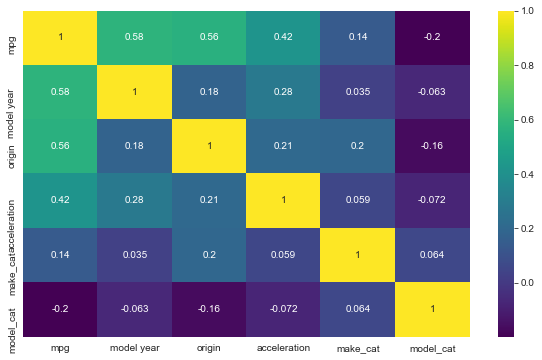

In [510]:
#Quality correlation matrix
k = 6 #number of variables for heatmap
cols = df.corr().nlargest(k, 'mpg')['mpg'].index
cm = df[cols].corr()
plt.figure(figsize=(10,6))
sns.heatmap(cm, annot=True, cmap = 'viridis')

/usr/local/anaconda3/envs/p8/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/anaconda3/envs/p8/lib/python3.8/site-packages/seaborn/_core.py:1303: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))
/usr/local/anaconda3/envs/p8/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/anaconda3/envs/p8/lib/python3.8/site-packages/seaborn/_core.py:1303: UserWarning: Vertical orientation ignor

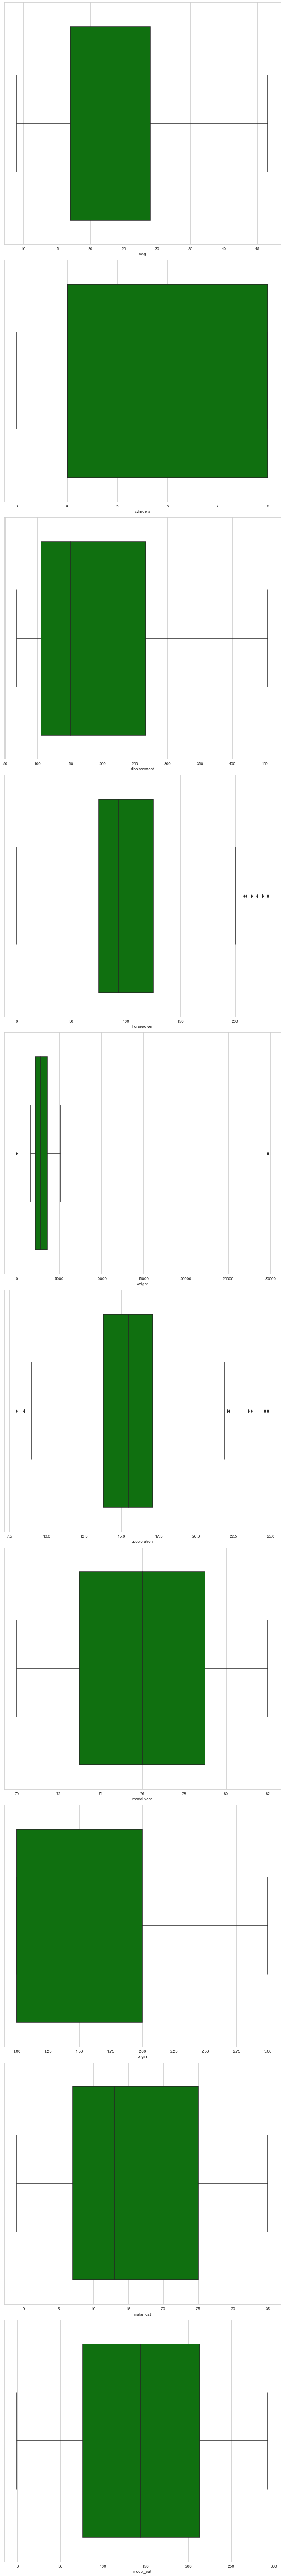

In [511]:
l = df.columns.values
l = [col for col in df if pd.api.types.is_numeric_dtype(df[col])]
number_of_columns=1
number_of_rows = 9
plt.figure(figsize=(10*number_of_columns,10*number_of_rows))
for i in range(0,len(l)):
    plt.subplot(number_of_rows + 1,number_of_columns,i+1)
    sns.set_style('whitegrid')
    sns.boxplot(df[l[i]],color='green',orient='v')
    plt.tight_layout()

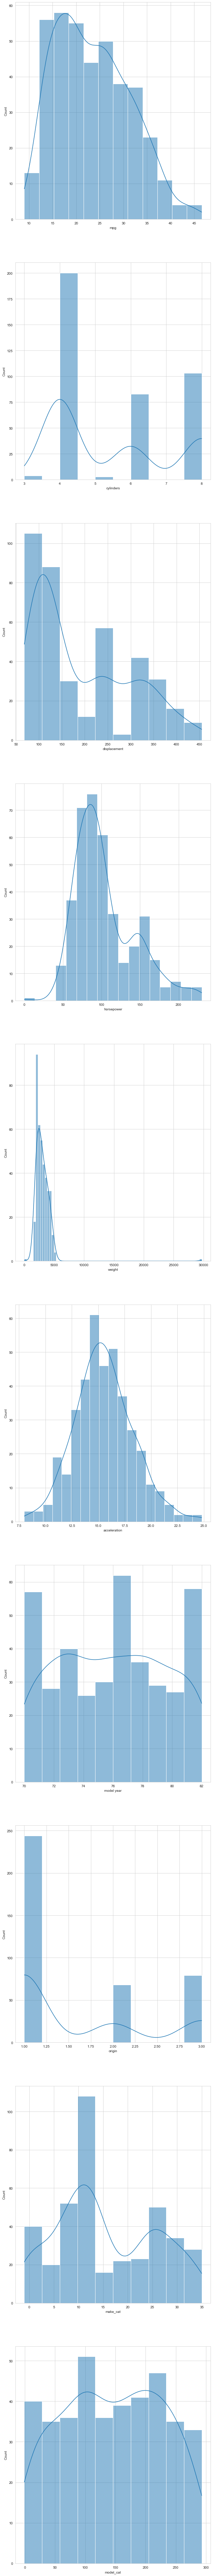

In [512]:
plt.figure(figsize=(10*number_of_columns,15*number_of_rows))
for i in range(0,len(l)):
    plt.subplot(number_of_rows + 1,number_of_columns,i+1)
    sns.histplot(df[l[i]],kde=True) 

In [645]:
df2 = df[["mpg","cylinders","displacement","horsepower","weight","acceleration","model year","make_cat","model_cat"]]

In [646]:
ss = StandardScaler()
ss.fit_transform(df2)

array([[-0.70000151,  1.48662863,  1.07984458, ..., -1.62016687,
        -0.84835962, -0.63184835],
       [-1.08533243,  1.48662863,  1.49136585, ..., -1.62016687,
        -1.24421041,  1.44036654],
       [-0.70000151,  1.48662863,  1.18511746, ..., -1.62016687,
         0.93296895,  1.34398445],
       ...,
       [ 1.09820948, -0.8620952 , -0.56624051, ...,  1.63813034,
        -1.6400612 , -1.75229012],
       [ 0.58443491, -0.8620952 , -0.70979444, ...,  1.63813034,
        -1.6400612 , -1.75229012],
       [ 0.96976584, -0.8620952 , -0.7193647 , ...,  1.63813034,
        -1.6400612 , -1.75229012]])

In [647]:
df2.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,make_cat,model_cat
0,18.0,8,307.0,130,3504,12.0,70,7,92
1,15.0,8,350.0,165,3693,11.5,70,3,264
2,18.0,8,318.0,150,3436,11.0,70,25,256
3,16.0,8,304.0,150,3433,12.0,70,0,246
4,17.0,8,302.0,140,3449,10.5,70,13,276


In [648]:
#K means Clustering 
def doKmeans(X, nclust=2):
    model = KMeans(nclust)
    model.fit(X)
    clust_labels = model.predict(X)
    cent = model.cluster_centers_
    return (clust_labels, cent)

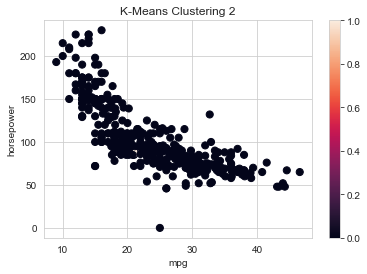

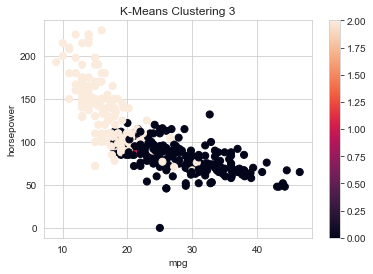

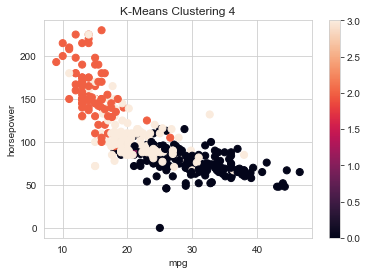

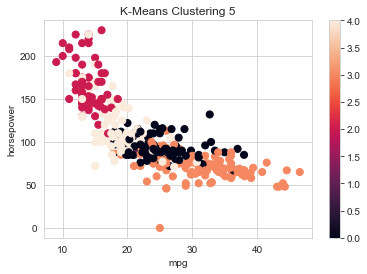

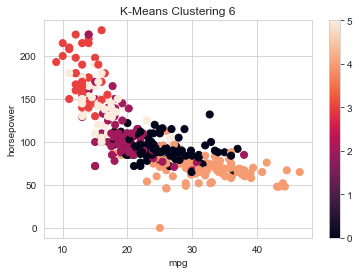

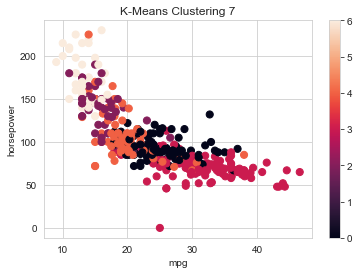

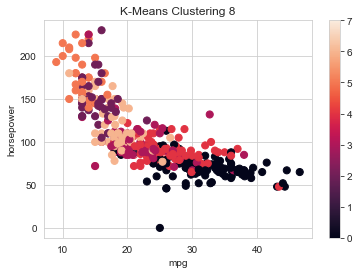

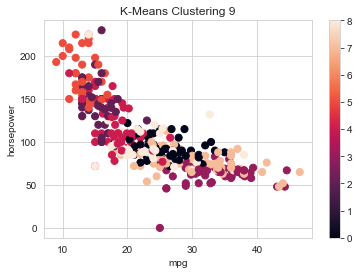

In [649]:
for i in range(2,10):
    clust_labels, cent = doKmeans(df2, i)
    kmeans = pd.DataFrame(clust_labels)
    #Plot the clusters obtained using k means
    fig = plt.figure()
    ax = fig.add_subplot(111)
    scatter = ax.scatter(df2['mpg'],df2['horsepower'],
                         c=kmeans[0],s=50)
    ax.set_title('K-Means Clustering ' +  str(i))
    ax.set_xlabel('mpg')
    ax.set_ylabel('horsepower')
    plt.colorbar(scatter)

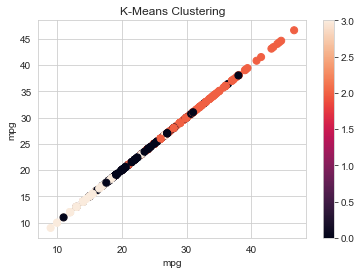

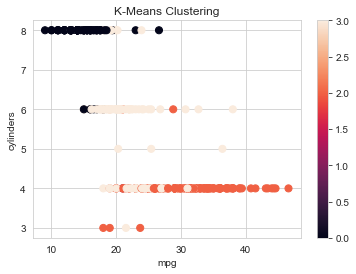

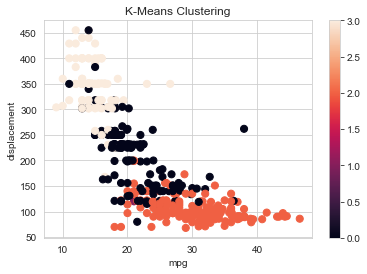

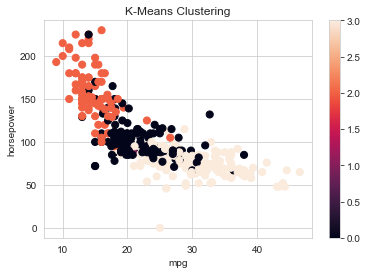

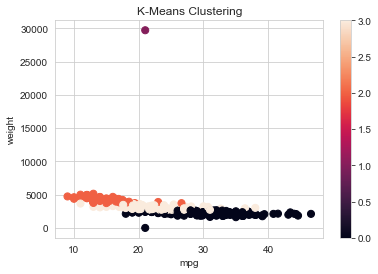

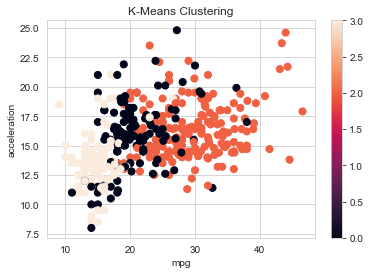

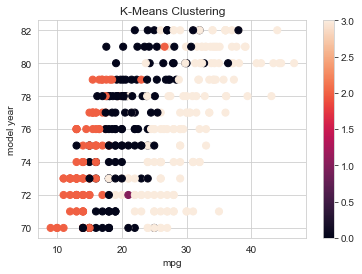

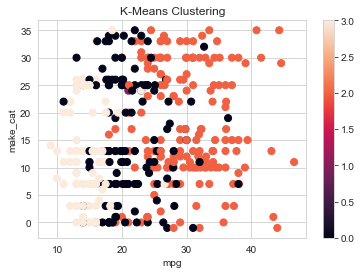

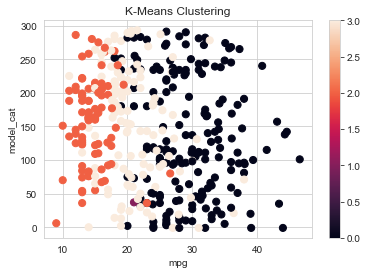

In [650]:
for col in df2:
    clust_labels, cent = doKmeans(df2, 4)
    kmeans = pd.DataFrame(clust_labels)
    #Plot the clusters obtained using k means
    fig = plt.figure()
    ax = fig.add_subplot(111)
    scatter = ax.scatter(df2['mpg'],df2[col],
                         c=kmeans[0],s=50)
    ax.set_title('K-Means Clustering')
    ax.set_xlabel('mpg')
    ax.set_ylabel(col)
    plt.colorbar(scatter)

In [651]:
def doAffinity(X):
    model = AffinityPropagation(damping = 0.5, max_iter = 250, affinity = 'euclidean')
    model.fit(X)
    clust_labels2 = model.predict(X)
    cent2 = model.cluster_centers_
    return (clust_labels2, cent2)

clust_labels2, cent2 = doAffinity(df2)
affinity = pd.DataFrame(clust_labels2)
df2.insert((df2.shape[1]),'affinity',affinity)

/usr/local/anaconda3/envs/p8/lib/python3.8/site-packages/sklearn/cluster/_affinity_propagation.py:148: FutureWarning: 'random_state' has been introduced in 0.23. It will be set to None starting from 1.0 (renaming of 0.25) which means that results will differ at every function call. Set 'random_state' to None to silence this warning, or to 0 to keep the behavior of versions <0.23.
  warnings.warn(


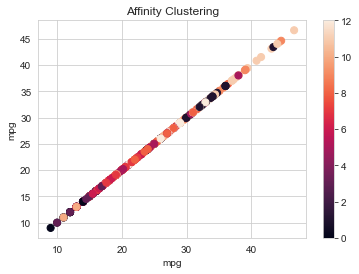

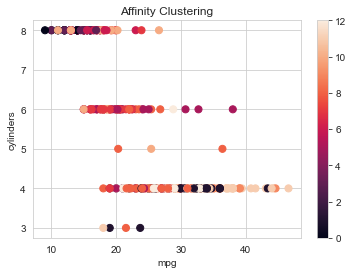

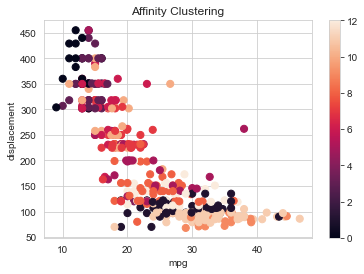

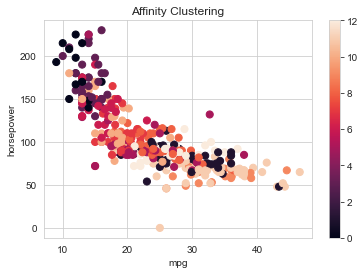

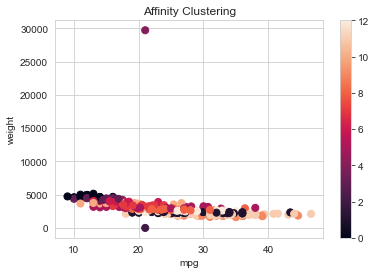

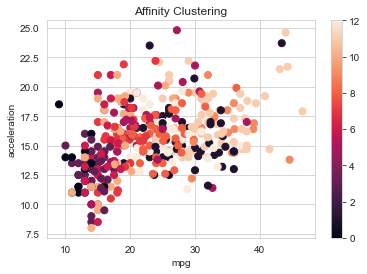

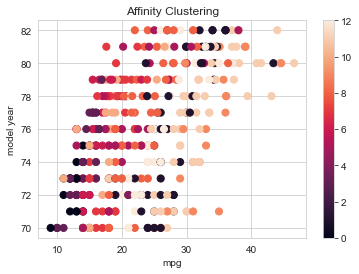

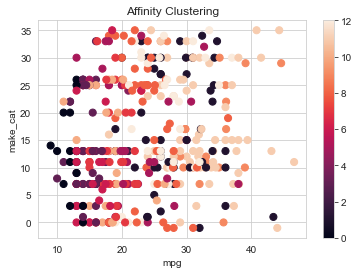

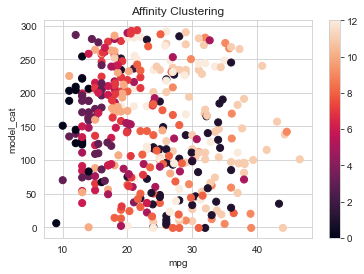

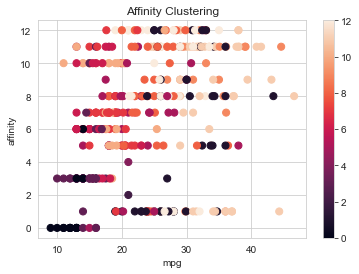

In [655]:
for col in df2:
    #Plotting the cluster obtained using Affinity algorithm
    fig = plt.figure()
    ax = fig.add_subplot(111)
    scatter = ax.scatter(df2['mpg'],df2[col],
                         c=affinity[0],s=50)
    ax.set_title('Affinity Clustering')
    ax.set_xlabel('mpg')
    ax.set_ylabel(col)
    plt.colorbar(scatter)